### All code below was used to create the Data class

In [77]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def sigmoid(x, L ,x0, k, b):
    #x input data
    # L scales output from [0,L]
    # x0 is the midpoint
    # k scales the input
    # b is the offset of output to [b,L+b]
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def toyData(function = sigmoid, k = 1, x0 = 0, L = 1, b = 0, mu = 0, std = 0.05):
    

    x = np.linspace(-10, 10, 30)  # 100 linearly spaced numbers from -10 to 10
    noise = np.random.normal(mu, std, x.shape)
    x_noisy = x + noise
    # print(L, x0, k, b)
    y = function(x_noisy, L ,x0, k, b)
    y_noisy = y + noise
     
    return(x_noisy,y_noisy)

def fitCurve(x, y, function = sigmoid):
    p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
    popt, pcov = curve_fit(function, x, y,p0, maxfev=10000,method='dogbox')
    fit_y = sigmoid(x, *popt)

    return(fit_y, popt)



x,y_noisy = toyData()
fit_y, params = fitCurve(x, y_noisy)

In [4]:
plt.scatter(x_noisy, y_noisy, label='Noisy data')
plt.plot(x, y, 'k-', label='Orginal')
plt.plot(x, fit_y, 'r-', label='Fitted')
plt.title('Sample Sigmoid Curve with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


NameError: name 'x_noisy' is not defined

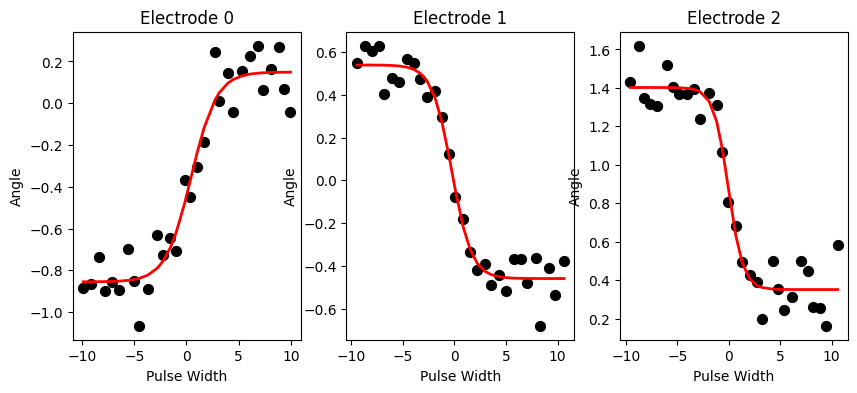

,L,x0,k,b
0,1.004511,0.448253,0.820957,-0.855315
1,-0.998978,-0.237718,1.044194,0.539397
2,-1.050691,-0.030234,1.397668,1.401987


In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import random

def electrodePlot():
    all_params = []
    fig, axs = plt.subplots(1, 3, figsize=(10,4))  # Change subplot configuration to 1x3 and adjust figsize
    for i in range(3):  # Loop through only 3 plots
        x, y_noisy = toyData(mu=np.random.rand(), std=0.1, k=random.randint(-1, 1), x0=0, L=random.randint(-1, 1), b=0)
        fit_y, params = fitCurve(x, y_noisy)
        all_params.append(params)
        axs[i].scatter(x, y_noisy, label='Noisy data', color='black', s=50)  # Black dots, make dots thicker using s
        axs[i].plot(x, fit_y, 'r-', label='Fitted curve', linewidth=2)  # Red lines, make line thicker
        axs[i].set_xlabel('Pulse Width')
        axs[i].set_ylabel('Angle')
        axs[i].set_title('Electrode ' + str(i))
        # axs[i].set_aspect('equal', adjustable='box')  # Make plots square
        # axs[i].legend()
    plt.savefig('c:/Users/Jjmas/OneDrive/Desktop/figures/curves.svg', format='svg')
    plt.show()
    df = pd.DataFrame(all_params, columns=['L', 'x0', 'k', 'b'])
    return df

electrodePlot()

In [65]:
def electrodePlot():
    all_params = []
    fig, axs = plt.subplots(4,4, figsize= (15,15))
    for i in range(16):
        row = i // 4  # Calculate the row index
        col = i % 4   # Calculate the column index
        x, y_noisy = toyData(mu = 0,std = 0.001, k = 1.7, x0 = 46, L = -2, b = -0.7)
        fit_y, params = fitCurve(x, y_noisy)
        all_params.append(params)
        axs[row, col].scatter(x, y_noisy, label='Noisy data')
        axs[row, col].plot(x, fit_y, 'r-', label='Fitted')
        axs[row, col].set_xlabel('x')
        axs[row, col].set_ylabel('y')
        axs[row, col].set_title('Electrode ' + str(i))
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b'])
    return(df)

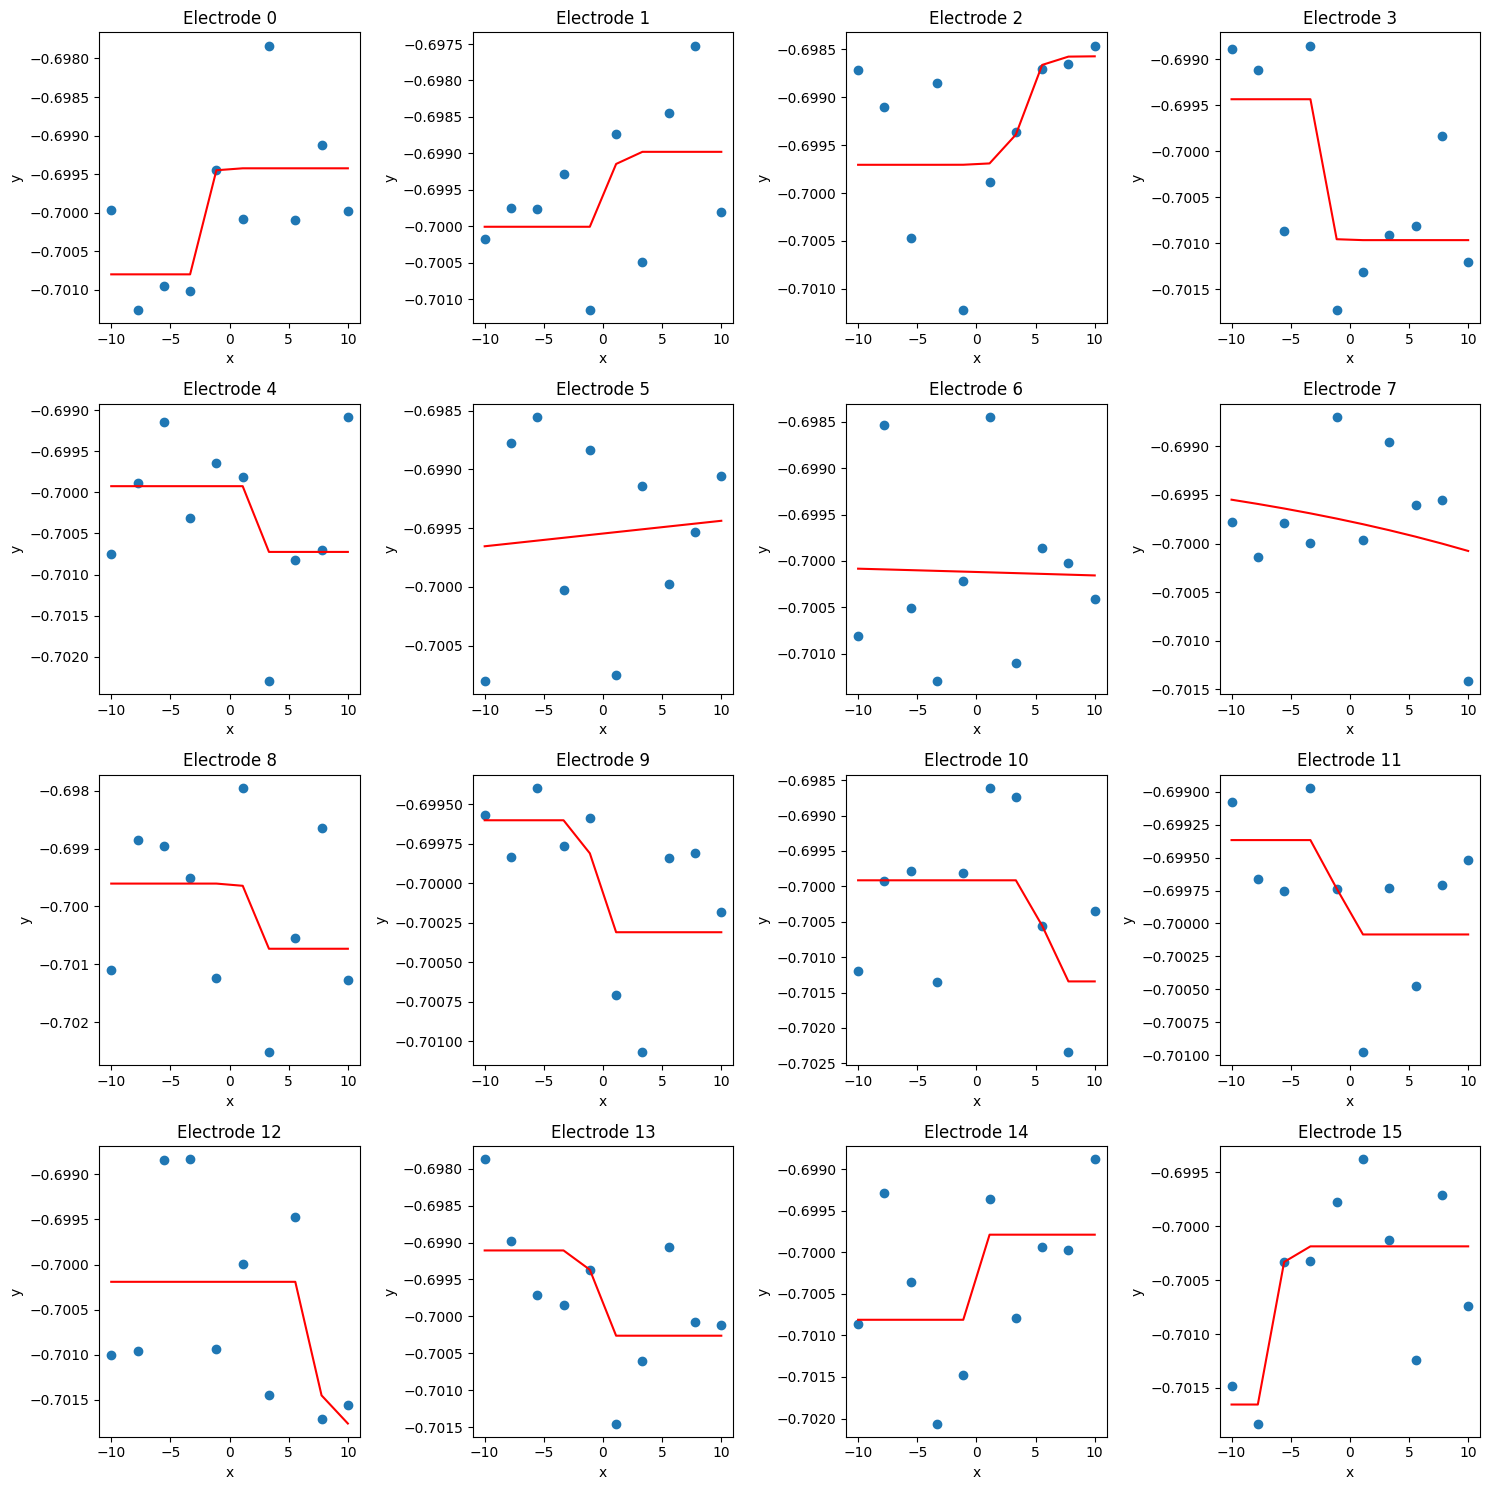

,L,x0,k,b
0,0.001374,-1.541377,9.239687,-0.700799
1,0.001028,0.848423,6.237076,-0.700007
2,0.001132,3.957814,1.531598,-0.699705
3,-0.001532,-1.646545,9.456670,-0.699435
4,-0.000799,2.155058,14.780763,-0.699925
5,-0.235734,0.634101,-0.000184,-0.581672
6,-0.001293,54.256848,0.012673,-0.699686
7,-0.411628,198.451321,0.031250,-0.698940
8,-0.001125,1.510764,8.430094,-0.699605
9,-0.000708,-0.963397,5.908135,-0.699602


In [66]:
df = electrodePlot()
df

### Trying to fit to Matt's Data

In [7]:
import scipy.io
from matplotlib import pyplot as plt

mattData = scipy.io.loadmat("C:/Users/Jjmas/OneDrive/Desktop/Research/Anne/Characterization.mat")

x_data = mattData['x_data']
y_data = mattData['y_data']
pulseWidth = x_data[0][0][0]




In [8]:
def electrodePlotMatt():
    fig, axs = plt.subplots(1,5, figsize= (15,5))
    angles= [ 'Index','MRS','Wrist']
    muscles= ['EDC','FDP','EIP',
             'ECRB', 'FCR' ]
    all_params = []
    for j in range(5):
        for i in range(3):
            # try:
            fit_y, params = fitCurve(pulseWidth,  y_data[j][i].flatten())
            all_params.append(list(params) + [j,i])
            # except:
            # print('Could not fit Line for ' + muscles[j] + ' ' + angles[i])
            axs[j].scatter(pulseWidth, y_data[j][i], label=angles[i])
            axs[j].plot(pulseWidth, fit_y, linestyle = '--')
        axs[j].set_title(muscles[j])
        axs[j].set_xlabel('Pulse Width')
        axs[j].set_ylabel('Angle Change')
    plt.legend()
    fig.suptitle('Electrode Characterization')
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b', 'Muscle', 'Angle'])
    return(df)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_40480\1015374344.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


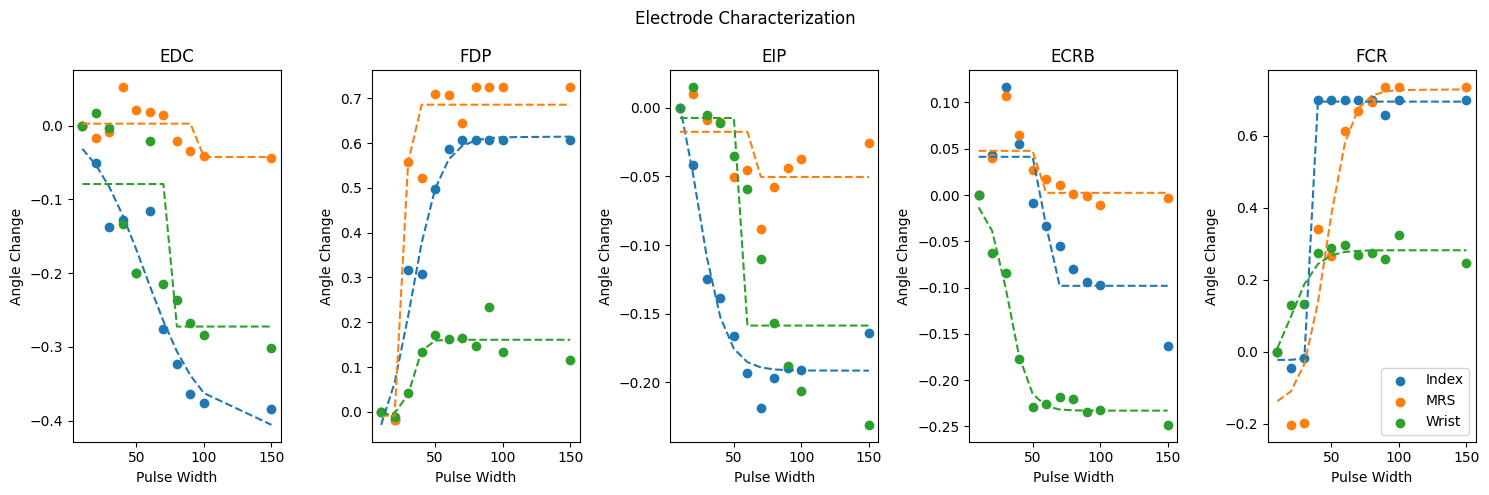

,L,x0,k,b,Muscle,Angle
count,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000
mean,0.135830,47.411727,24.756551,-0.021618,2.00000,1.000000
std,0.426921,20.874117,30.622360,0.058430,1.46385,0.845154
min,-0.422066,20.575641,0.046981,-0.150316,0.00000,0.000000
25%,-0.172118,32.032908,0.112466,-0.049473,1.00000,0.000000
50%,-0.045139,46.292845,1.708981,-0.007417,2.00000,1.000000
75%,0.526351,58.757454,60.979431,0.006935,3.00000,2.000000
max,0.879799,93.583864,61.002435,0.054725,4.00000,2.000000


In [30]:
realParams = electrodePlotMatt()
realParams.describe()


In [24]:
from scipy.interpolate import interp1d

def getSample(min_val, q25, median, q75, max_val):
    # Points on the empirical CDF
    x = [min_val, q25, median, q75, max_val]
    y = [0, 0.25, 0.5, 0.75, 1.0]

    # Interpolate the CDF
    f = interp1d(y, x, kind='linear')

    # Generate a single sample
    u = np.random.rand()  # Generate one uniform random number between 0 and 1
    sample = f(u)  # Find the corresponding sample value from the interpolated CDF
    return sample
df.median()


L     1.007924
x0    0.002456
k     1.011392
b     0.415662
dtype: float64

### Modeling independent electrode interactions and possible angle space

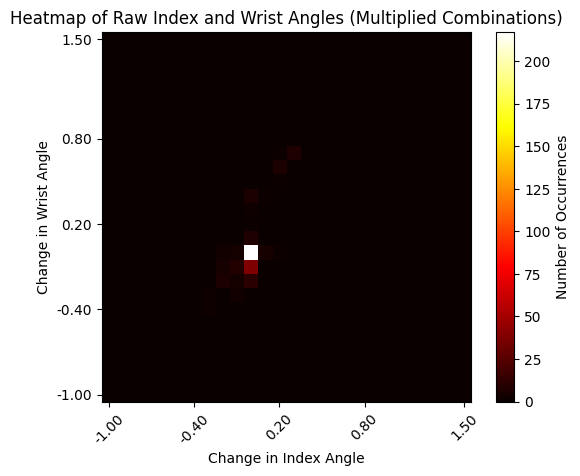

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
class AngleDict:
    def __init__(self, start=-0.5, end=0.5, binSize=0.1):
        self.start = start
        self.end = end
        self.binSize = binSize
        self.d = self.createDict()

    def createDict(self):
        self.d = {}
        self.bins = np.arange(self.start, self.end + self.binSize, self.binSize)
        for x in self.bins:
            # index = round(x, 1) + 0
            for y in self.bins:
                # wrist = round(y, 1) + 0
                key = (float(f"{x:.1f}"), float(f"{y:.1f}"))
                self.d[key] = 0
        return self.d

    def dictChecker(self, pose1, pose2):
        if len(pose1.shape) == 1:
            pose1 = np.squeeze(list(pose1))
            pose2 =  np.squeeze(list(pose2))
        rows, cols = pose1.shape
        for i in range(rows):
            for j in range(cols):
                key = (float(f"{pose1[i, j]:.1f}"), float(f"{pose2[i, j]:.1f}"))
                if key in self.d:
                    self.d[key] += 1
                else:
                    print(f'Key: {key} not in dictionary')

    def dictPlot(self):
        heatmap = (np.array(list(self.d.values())).reshape((len(self.bins), len(self.bins))))
        plt.imshow(heatmap, cmap='hot',interpolation='nearest', origin='lower')
        cbar = plt.colorbar()
        cbar.locator = ticker.MaxNLocator(integer=True)  #fix to make sure it's only integers
        cbar.update_ticks()
        cbar.set_label('Number of Occurrences')
        plt.title('Heatmap of Raw Index and Wrist Angles (Multiplied Combinations)')
        plt.xlabel('Change in Index Angle')
        plt.ylabel('Change in Wrist Angle')

        num_ticks = 5  # Number of ticks to show on each axis
        tick_indices = np.linspace(0, len(self.bins) - 1, num_ticks, dtype=int)  # Indices of the ticks to show
        tick_labels = [f"{self.bins[i]:.2f}" for i in tick_indices]  # Format labels to two decimal places

        # Apply the ticks and labels to the plot
        plt.xticks(tick_indices, tick_labels, rotation=45)  # Rotate x labels for better visibility
        plt.yticks(tick_indices, tick_labels)
        plt.savefig('heatmap_sum.svg', format='svg')
        plt.show()

# Usage:
test = AngleDict(start=-1, end=1.5, binSize=0.1)
indexTrue, wristTrue = y_data[:, 0], y_data[:, 2]
test.dictChecker(index, wrist)
test.dictPlot()


In [8]:
def sigmoidSum(state, realParams):
    index, mrs, wrist = 0, 0, 0
    for e, is_active in enumerate(state):
        # print(e)
        # index, mrs, wrist = 0, 0, 0
        # print(e, is_active)
        if (is_active):
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 0)].loc[:,['L','x0','k','b']].values[0]
            index+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 1)].loc[:,['L','x0','k','b']].values[0]
            mrs+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 2)].loc[:,['L','x0','k','b']].values[0]
            wrist+= sigmoid(pulseWidth, *param )
    return index, mrs, wrist

def sigmoidMult(state, realParams):
    index, mrs, wrist = 1, 1, 1
    for e, is_active in enumerate(state):
        if (is_active):
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 0)].loc[:,['L','x0','k','b']].values[0]
            index*= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 1)].loc[:,['L','x0','k','b']].values[0]
            mrs*= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 2)].loc[:,['L','x0','k','b']].values[0]
            wrist*= sigmoid(pulseWidth, *param )
    return index, mrs, wrist              

testSum = sigmoidMult(electrodeStates[4], realParams)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


In [13]:
import itertools
electrodeStates = list(itertools.product([0,1], repeat=5))  # all possible electrode states
# len(electrodeStates)

angle_spaces = [sigmoidMult(state, realParams) for state in electrodeStates]

test2 = np.array(angle_spaces[1:])
index = test2[:,0]
wrist = test2[:,2]

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28372\2567883890.py:12: RuntimeWarning: overflow encount